<a href="https://colab.research.google.com/github/marcus2348532/2348532_AML/blob/main/2348532_lab1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import scipy as sp
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [62]:
data = pd.read_csv('/content/Program_1_Dataset.csv')

In [3]:
data.head()

,Crime_Rate,Zone_proportion,Non_Retail_Acres,CHAS,NOX,Avg_rooms,AGE,Distance,RAD,Property_TaxRate,PTRATIO,B,LSTAT,MValue
0,0.06860,0.0,2.89,0,0.445,7.416,62.5,3.4952,2,276,18.0,396.90,6.19,33.2
1,0.14866,0.0,8.56,0,0.520,6.727,79.9,2.7778,5,384,20.9,394.76,9.42,27.5
2,0.11432,0.0,8.56,0,0.520,6.781,71.3,2.8561,5,384,20.9,395.58,7.67,26.5
3,0.22876,0.0,8.56,0,0.520,6.405,85.4,2.7147,5,384,20.9,70.80,10.63,18.6
4,0.21161,0.0,8.56,0,0.520,6.137,87.4,2.7147,5,384,20.9,394.47,13.44,19.3


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Crime_Rate        506 non-null    float64
 1   Zone_proportion   506 non-null    float64
 2   Non_Retail_Acres  506 non-null    float64
 3   CHAS              506 non-null    int64  
 4   NOX               506 non-null    float64
 5   Avg_rooms         506 non-null    float64
 6   AGE               506 non-null    float64
 7   Distance          506 non-null    float64
 8   RAD               506 non-null    int64  
 9   Property_TaxRate  506 non-null    int64  
 10  PTRATIO           506 non-null    float64
 11  B                 506 non-null    float64
 12  LSTAT             506 non-null    float64
 13  MValue            506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [5]:
data.shape

(506, 14)

In [6]:
data.isnull().sum()

Crime_Rate          0
Zone_proportion     0
Non_Retail_Acres    0
CHAS                0
NOX                 0
Avg_rooms           0
AGE                 0
Distance            0
RAD                 0
Property_TaxRate    0
PTRATIO             0
B                   0
LSTAT               0
MValue              0
dtype: int64

In [10]:
data['MValue'].unique()


array([33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 20.4, 19.8, 19.4, 21.7,
       22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 22. , 20.3, 20.5, 17.3,
       21.4, 15.7, 16.2, 18. , 14.3, 19.6, 23. , 18.4, 15.6, 18.1, 17.4,
       17.1, 13.3, 17.8, 14. , 14.4, 13.4, 11.8, 13.8, 14.6, 15.4, 21.5,
       15.3, 17. , 13.1, 41.3, 24.3, 23.3, 27. , 50. , 22.7, 25. , 23.8,
       22.3, 19.1, 23.1, 23.6, 22.6, 29.4, 23.2, 24.6, 29.9, 37.2, 39.8,
       36.2, 37.9, 32.5, 26.4, 29.6, 32. , 29.8, 34.9, 37. , 30.5, 36.4,
       31.1, 29.1, 33.3, 30.3, 34.6, 32.9, 24.1, 42.3, 48.5, 24.4, 22.5,
       20. , 22.4, 28.1, 23.7, 28.7, 26.7, 30.1, 44.8, 37.6, 31.6, 46.7,
       31.5, 31.7, 41.7, 48.3, 29. , 24. , 25.1, 22.2, 17.6, 24.5, 26.2,
       24.8, 42.8, 21.9, 20.9, 44. , 36. , 33.8, 43.1, 48.8, 31. , 36.5,
       30.7, 43.5, 20.7, 21.1, 25.2, 35.2, 32.4, 33.1, 35.1, 45.4, 35.4,
       46. , 32.2, 28.5, 37.3, 27.9, 23.9, 28.6, 27.1, 36.1, 28.4, 33.4,
       28.2, 16.1, 22.1, 21.6, 21. , 20.6, 19. , 32

In [14]:
data.corr()

,Crime_Rate,Zone_proportion,Non_Retail_Acres,CHAS,NOX,Avg_rooms,AGE,Distance,RAD,Property_TaxRate,PTRATIO,B,LSTAT,MValue
Crime_Rate,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
Zone_proportion,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
Non_Retail_Acres,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
Avg_rooms,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
Distance,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
Property_TaxRate,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


<Axes: >

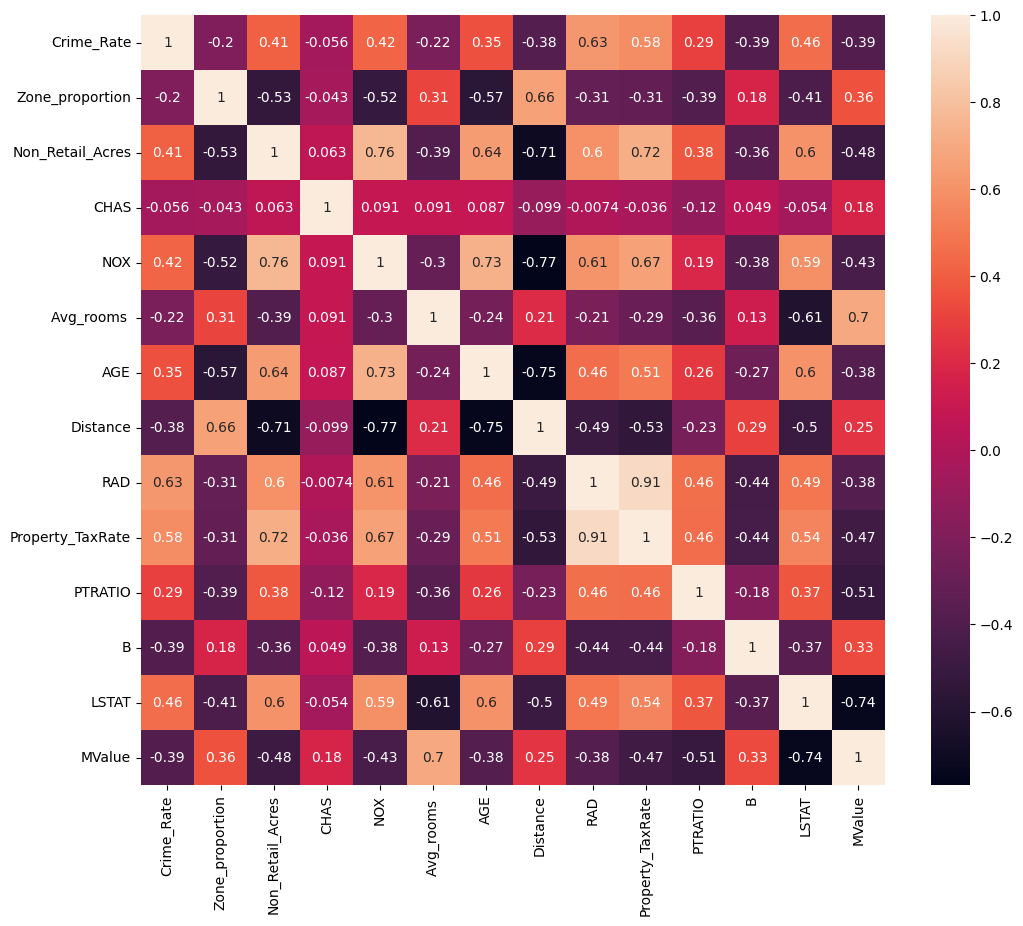

In [15]:
plt.figure(figsize = (12,10))

sns.heatmap(data.corr(), annot =True)

In [23]:
x=data['Avg_rooms ']
y=data['MValue']

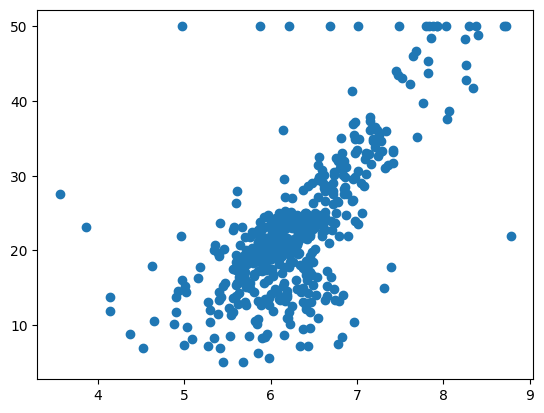

In [26]:
plt.scatter(x, y)

In [65]:
X = data['Avg_rooms ']  # Drop the 'target' column to get the features
y = data['MValue']  # Scelect only the 'target' column as the target variable
from sklearn.model_selection import train_test_split
X=X.values.reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

In [66]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(X_train,y_train)
print("intercept:",model.intercept_,'\nCoefficients',model.coef_)

intercept: -34.34727375285257 
Coefficients [9.07932396]


In [67]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
y_pred=model.predict(X_train)
print("Training Score:\n",model.score(X_train,y_train)*100)
print("Mean Squared Error:\n",mean_squared_error(y_train,y_pred))
print("R2 score is:\n",r2_score(y_train,y_pred))



Training Score:
 49.94134213312722
Mean Squared Error:
 42.65621306291863
R2 score is:
 0.4994134213312722


In [68]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
y_pred=model.predict(X_test)
print("Mean Squared Error:\n",mean_squared_error(y_test,y_pred))
print("R2 score is:\n",r2_score(y_test,y_pred))

Mean Squared Error:
 45.90875794536519
R2 score is:
 0.4426499668981023


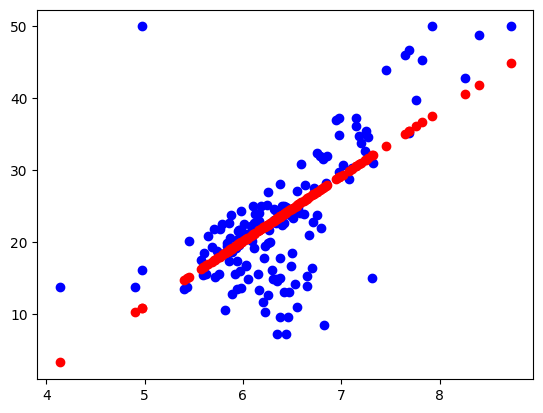

In [69]:
plt.scatter(X_test,y_test, color='blue')
plt.scatter(X_test,y_pred, color='red')
plt.show()


In [60]:
X_train.info()

AttributeError: ignored